import libraries and modules

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix,classification_report,ConfusionMatrixDisplay






loading datasets,both test and train

In [194]:
train_df0=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

In [232]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


lets have a look at the data

In [195]:
train_df=train_df0.copy()
train_df.head()
train_df.shape


(891, 12)

In [196]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


checking for null and duplicates

In [197]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [198]:
train_df.drop(columns=['Cabin','PassengerId','Name'], inplace=True)

In [199]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [200]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [201]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<function matplotlib.pyplot.show(close=None, block=None)>

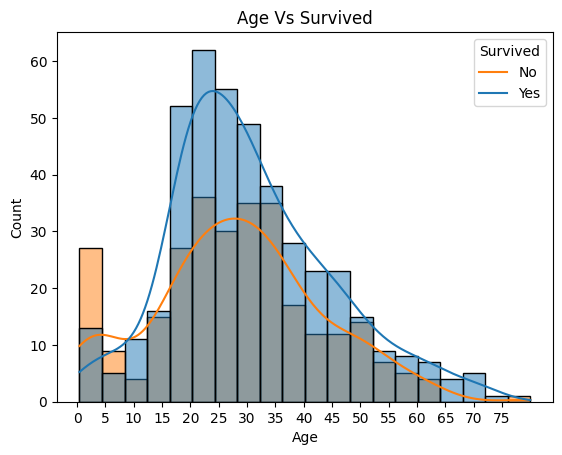

In [202]:
sns.histplot(data=train_df,x='Age',hue='Survived',bins=20,kde=True,color='blue')
plt.title("Age Vs Survived")
plt.xlabel=('Age')
plt.ylabel=('Survived Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.xticks(range(0, 80, 5))
plt.show

In [203]:
missing_age_rows = train_df[train_df['Age'].isnull()]
pd.DataFrame(missing_age_rows).head(50)



,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,male,NaN,0,0,330877,8.4583,Q
17,1,2,male,NaN,0,0,244373,13.0000,S
19,1,3,female,NaN,0,0,2649,7.2250,C
26,0,3,male,NaN,0,0,2631,7.2250,C
28,1,3,female,NaN,0,0,330959,7.8792,Q
29,0,3,male,NaN,0,0,349216,7.8958,S
31,1,1,female,NaN,1,0,PC 17569,146.5208,C
32,1,3,female,NaN,0,0,335677,7.7500,Q
36,1,3,male,NaN,0,0,2677,7.2292,C
42,0,3,male,NaN,0,0,349253,7.8958,C


missing values imputing

In [204]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Impute missing values for 'Embarked' with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [205]:
train_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [206]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)


In [207]:
train_df['Embarked_Q'] = train_df['Embarked_Q'].astype(int)


In [208]:
train_df['Embarked_S'] = train_df['Embarked_S'].astype(int)


In [209]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,1,1,female,35.0,1,0,113803,53.1000,0,1
4,0,3,male,35.0,0,0,373450,8.0500,0,1


In [210]:
train_df.drop(columns=['Ticket'],inplace=True)

In [211]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,0,0
2,1,3,female,26.0,0,0,7.9250,0,1
3,1,1,female,35.0,1,0,53.1000,0,1
4,0,3,male,35.0,0,0,8.0500,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

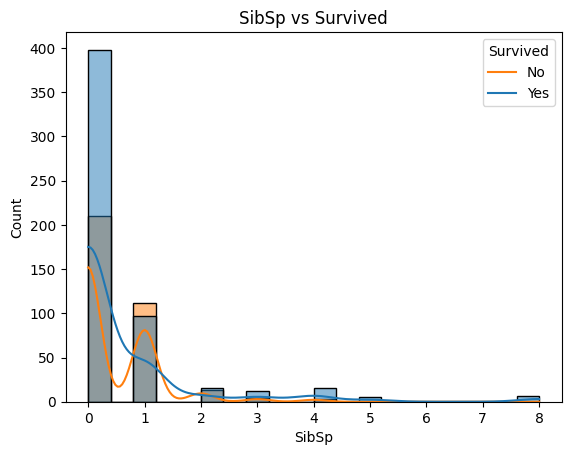

In [212]:
sns.histplot(data=train_df,x='SibSp',hue='Survived',bins=20,kde=True,color='blue')
plt.title('SibSp vs Survived')
plt.xlabel=('SibSp')
plt.ylabel=('Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show



In [213]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,0,0
2,1,3,female,26.0,0,0,7.9250,0,1
3,1,1,female,35.0,1,0,53.1000,0,1
4,0,3,male,35.0,0,0,8.0500,0,1


In [215]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
train_df['IsAlone'] = (train_df['FamilySize'] == 0).astype(int)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,0,1,1,0
1,1,1,female,38.0,1,0,71.2833,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0,1,0,1
887,1,1,female,19.0,0,0,30.0000,0,1,0,1
888,0,3,female,28.0,1,2,23.4500,0,1,3,0
889,1,1,male,26.0,0,0,30.0000,0,0,0,1


In [217]:
train_df.drop(columns=['SibSp','Parch'],inplace=True)

In [226]:
train_df.head()

,Survived,Pclass,Age,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,Sex_male
0,0,3,22,7,0,1,1,0,1
1,1,1,38,71,0,0,1,0,0
2,1,3,26,7,0,1,0,1,0
3,1,1,35,53,0,1,1,0,0
4,0,3,35,8,0,1,0,1,1


In [225]:
train_df=pd.get_dummies(train_df, columns=['Sex'], drop_first=True).astype(int)


In [227]:
X = train_df[['Pclass', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'Sex_male']]
y = train_df['Survived']

Splti data

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [230]:
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

param_grids = {
    'Naive Bayes': {},  # No hyperparameters for Naive Bayes
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.001, 0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
}

# Perform GridSearchCV for each classifier
results = {}
for clf_name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    results[clf_name] = (best_model, grid_search.best_params_)

# Evaluate the best models
for clf_name, (best_model, best_params) in results.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} - Best Model Accuracy: {accuracy}, Best Parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Naive Bayes - Best Model Accuracy: 0.7877094972067039, Best Parameters: {}
Random Forest - Best Model Accuracy: 0.8044692737430168, Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Logistic Regression - Best Model Accuracy: 0.7932960893854749, Best Parameters: {'C': 1, 'penalty': 'l2'}
Decision Tree - Best Model Accuracy: 0.8379888268156425, Best Parameters: {'max_depth': None, 'min_samples_split': 10}
Gradient Boosting - Best Model Accuracy: 0.7988826815642458, Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [231]:
best_params_dt = results['Decision Tree'][1]
best_model_dt = DecisionTreeClassifier(**best_params_dt)

# Train the Decision Tree classifier on the entire training dataset
best_model_dt.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred_dt = best_model_dt.predict(X_test)

# Evaluate the Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree - Test Accuracy:", accuracy_dt)

Decision Tree - Test Accuracy: 0.8379888268156425


In [235]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred_dt)

Precision: 0.8125
Recall: 0.7536231884057971
F1 Score: 0.7819548872180452
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



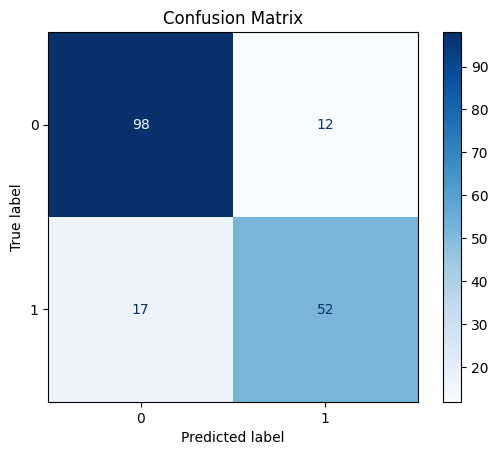

In [236]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

Unseen data or test data

In [252]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,male,34.5,0,0,7.8292,1,0
1,3,female,47.0,1,0,7.0000,0,1
2,2,male,62.0,0,0,9.6875,1,0
3,3,male,27.0,0,0,8.6625,0,1
4,3,female,22.0,1,1,12.2875,0,1


In [238]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [240]:
test_df.drop(columns=['Cabin','PassengerId','Name'], inplace=True)

In [241]:
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [244]:
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

In [247]:
test_df['Embarked_Q'] = test_df['Embarked_Q'].astype(int)

In [249]:
test_df['Embarked_S'] = test_df['Embarked_S'].astype(int)

In [251]:
test_df.drop(columns=['Ticket'],inplace=True)

In [256]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']
test_df['IsAlone'] = (test_df['FamilySize'] == 0).astype(int)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,3,male,34.5,0,0,7.8292,1,0,0,1
1,3,female,47.0,1,0,7.0000,0,1,1,0
2,2,male,62.0,0,0,9.6875,1,0,0,1
3,3,male,27.0,0,0,8.6625,0,1,0,1
4,3,female,22.0,1,1,12.2875,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...
413,3,male,28.0,0,0,8.0500,0,1,0,1
414,1,female,39.0,0,0,108.9000,0,0,0,1
415,3,male,38.5,0,0,7.2500,0,1,0,1
416,3,male,28.0,0,0,8.0500,0,1,0,1


In [257]:
test_df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [262]:
test_df=pd.get_dummies(test_df, columns=['Sex'], drop_first=True).astype(int)


In [261]:
test_df.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
FamilySize    0
IsAlone       0
dtype: int64

In [260]:
test_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)

In [263]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,Sex_male
0,3,34,0,0,7,1,0,0,1,1
1,3,47,1,0,7,0,1,1,0,0
2,2,62,0,0,9,1,0,0,1,1
3,3,27,0,0,8,0,1,0,1,1
4,3,22,1,1,12,0,1,2,0,0


In [264]:
test_df.drop(columns=['SibSp','Parch'],inplace=True)

In [265]:
test_df.head()

,Pclass,Age,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,Sex_male
0,3,34,7,1,0,0,1,1
1,3,47,7,0,1,1,0,0
2,2,62,9,1,0,0,1,1
3,3,27,8,0,1,0,1,1
4,3,22,12,0,1,2,0,0


In [266]:
test_copy=pd.read_csv('/content/test - Copy.csv')

In [267]:
survival_probabilities = best_model_dt.predict_proba(test_df)[:, 1]
threshold = 0.5  # You can adjust this threshold as needed

# Convert survival probabilities to binary predictions
predictions = (survival_probabilities > threshold).astype(int)

# Create a submission dataframe with passenger IDs and binary predictions
submission_df = pd.DataFrame({
    'PassengerId': test_copy['PassengerId'],  # Assuming 'PassengerId' is a column in the test dataframe
    'Survived': predictions  # Include the binary predictions (0 or 1)
})

# Write the submission dataframe to a CSV file
submission_df.to_csv('submission.csv', index=False)